# PYTORCH 소개(INTRODUCTION TO PYTORCH)
- URL from : https://tutorials.pytorch.kr/beginner/introyt/introyt1_tutorial.html
- URL from for 오탈자 : https://pytorch.org/tutorials/beginner/introyt/introyt1_tutorial.html
- Video from : https://youtu.be/IC0_FRiX-sw

In [1]:
import torch

몇 가지 기본적인 tensor 조작을 알아보자. 처음으로, tensor를 만드는 몇 가지 방법을 살펴보도록 하자

In [2]:
z = torch.zeros(5, 3)
print(z)
print(z.dtype)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.float32


위에서, 0으로 채워진 5 x 3 행렬을 만들고, 파이토치의 기본 타입인 0으로 채워진 32bit 부동소수점 데이터 타입인지 확인해보았다. 만약, 정수형 데이터 타입을 원한다면 기본값을 재정의할 수 있다.

In [3]:
i = torch.ones((5, 3), dtype=torch.int16)
print(i)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)


dtype의 기본값을 변경하면 tensor가 출력될 때 데이터 타입을 확인할 수 있다. 학습 가중치를 무작위로 초기화하는 것이 일반적이며, 결과의 재현성을 위해 PRNG에 대한 특정 시드로 초기화한다.

In [4]:
torch.manual_seed(323)
r1 = torch.rand(2, 2)
print("랜덤 tensor 값 : ")
print(r1)

r2 = torch.rand(2, 2)
print("\n다른 랜덤 tensor 값 : ")
print(r2) # 새로운 2 x 2 행렬 값

torch.manual_seed(323)
r3 = torch.rand(2, 2)
print("\nr1과 일치 :")
print(r3) # 동일한 시드값으로 인해 r1 값이 반복되어 행렬값으로 나온다.

랜덤 tensor 값 : 
tensor([[0.1874, 0.8593],
        [0.2488, 0.9769]])

다른 랜덤 tensor 값 : 
tensor([[0.3856, 0.5467],
        [0.1230, 0.3807]])

r1과 일치 :
tensor([[0.1874, 0.8593],
        [0.2488, 0.9769]])


pytorch tensor는 산술 연산을 직관적으로 수행한다. 유사한 shape의 tensor들이 더하거나 곱하거나 그 외 연산도 가능하다. 스칼라를 사용한 연산은 tensor에 분산된다.

In [5]:
ones = torch.ones(2, 3)
print(ones)

twos = torch.ones(2, 3) * 2 # 모든 원소에 2(=스칼라 값)를 곱한다.
print(twos)

threes = ones + twos # shape이 비슷하기 때문에 더할 수 있다.
print(threes)        # tensor의 원소별로 더한 값이 결과로 나온다.
print(threes.shape)  # 입력 tensor와 동일한 차원을 가지고 있다.

r1 = torch.rand(2, 3)
r2 = torch.rand(3, 2)
# runtime error를 발생시키려면 아래 줄의 주석을 풀어주자
# r3 = r2 + r2

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.]])
tensor([[3., 3., 3.],
        [3., 3., 3.]])
torch.Size([2, 3])


이번엔 사용 가능한 여러 수학 연산 예제를 돌려보자.

In [6]:
r = (torch.rand(2, 2) - 0.5) * 2 # -1과 1 사이의 값을 갖는다.
print("랜덤 행렬값 >>> r :")
print(r)

# 일반적인 수학적 연산은 다음과 같이 지원된다.
print('\n r의 절댓값 >>> ')
print(torch.abs(r))

# 삼각함수도 쓸 수 있다.
print('\n r의 역사인 함수 >>> ')
print(torch.asin(r))

# 행렬식 및 특이값 분해와 같은 선형대수 연산도 쓸 수 있다.
print('\n r의 행렬식 >>>')
print(torch.det(r))
print('\n r의 특이값 분해 >>>')
print(torch.svd(r))

# x통계 및 집합 연산도 쓸 수 있다.
print('\n r의 평균 및 표준편차 >>>')
print(torch.std_mean(r))
print('\n r의 최댓값 >>>')
print(torch.max(r))

랜덤 행렬값 >>> r :
tensor([[ 0.5125,  0.1044],
        [-0.9864,  0.6116]])

 r의 절댓값 >>> 
tensor([[0.5125, 0.1044],
        [0.9864, 0.6116]])

 r의 역사인 함수 >>> 
tensor([[ 0.5381,  0.1046],
        [-1.4057,  0.6580]])

 r의 행렬식 >>>
tensor(0.4165)

 r의 특이값 분해 >>>
torch.return_types.svd(
U=tensor([[-0.3375,  0.9413],
        [ 0.9413,  0.3375]]),
S=tensor([1.2269, 0.3394]),
V=tensor([[-0.8978,  0.4405],
        [ 0.4405,  0.8978]]))

 r의 평균 및 표준편차 >>>
(tensor(0.7317), tensor(0.0605))

 r의 최댓값 >>>
tensor(0.6116)


GPU에서 병렬연산을 위해 설정하는 방법을 포함해서 pytorch tensor의 강력함에 대해 더 알아야 할 것이 있다. 일단 pytorch에서 model을 표현할 수 있는 방법에 대해 알아보자.

In [7]:
import torch # pytorch의 모든 모듈 가져오기
import torch.nn as nn # torch.nn.Module의 경우 pytorch model의 부모 객체
import torch.nn.functional as F # 활성화 함수 모듈 가져오기

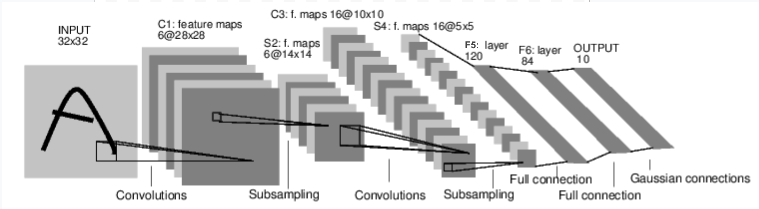
LeNet-5의 다이어그램은 초기 합성곱 신경망 중 하나이자 딥러닝에서 폭발적 인기를 일으킨 요인 중 하나다. 손글씨 이미지(MNIST 데이터셋)를 읽고 이미지에 어떤 숫자가 표현되었는지 정확하게 분류하기 위해 제작되었다.

LeNet-5가 어떻게 동작하는지는 아래와 같다.
- 계층 C1은 합성곱 계층이다. 즉, 입력 이미지에서 학습 중에 배웠던 특징을 검색한다. 이미지에서 학습된 각 특징을 위치에 대한 출력 맵으로 보여준다. 이 활성화 맵으로 S2 계층에서 다운샘플링된다.
- 계층 C3은 다른 합성곱 계층으로, 이 시점에서 특징들의 조합을 위해 C1의 활성화 맵을 검색한다. 또한. S4 계층에서 다운샘플링 된 이러한 특징 조합의 spatial locations를 제공한다.
- 마지막으로, 완전 연결 계층(fully-connected layers)인 F5, F6, Output은 최종 활성화 맵을 가져와 10진수를 표현하는 10개의 bin 중 하나로 분류하는 분류기(classifier)다.

이 간단한 신경망을 코드로 표현해보면,

In [8]:
class LeNet(nn.Module) :
    def __init__(self) :
        super(LeNet, self).__init__()

        # 입력 이미지 채널, 6개의 output 채널, 3 x 3 정방 합성곱 커널을 사용한다
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)

        # affine 변환 : y = Wx + b
        self.fc1 = nn.Linear(16 * 6 * 6, 120) # 6 x 6 이미지 차원
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x) :
        # max pooling은 (2, 2) 윈도우 크기를 사용한다.
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))

        # 크기가 정방 사이즈인 경우, 단일 숫자만 지정할 수도 있다.
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x) 
        return x

    def num_flat_features(self, x) :
        size = x.size()[1:] # 크기는 배치 차원을 제외한 모든 차원을 가져온다.
        num_features = 1
        for s in size :
            num_features *= s
        return num_features

코드를 살펴보면 구조적으로 위의 다이어그램과 유사한 점을 발견할 수 있다.  
다음은 일반적인 pytorch model의 구조를 보여주는데,  
- 모듈은 중첩될 수 있으며, ```torch.nn.Module```에서 상속된다. 실제로, ```Conv2d```와 ```Linear``` 계층 클래스도 ```torch.nn.Module```에서 상속된다.
- 모델은 계층을 인스턴스화 하고 필요한 데이터 아티팩트를 로드하는 ```__init__()``` 함수를 가지고 있다. 예를 들면, NLP 모델은 어휘를 불러올 수 있다든가
- 모델은 ```forward()``` 함수를 가지고 있다. 여기서 실제 연산이 수행된다. 입력은 네트워크 계층 및 다양한 기능들을 통과시켜서 결과를 생성한다.
- 그 외에는 다른 파이썬 클래스처럼 모델 클래스를 구성할 수 있다. python 클래스, 모델의 계산을 지원하는 데 필요한 속성 및 메서드를 추가한다.  

그럼 이제 만든 객체를 인스턴스화 하고 샘플 입력을 통해 실행해보자.

In [9]:
net = LeNet()
print(net) # 인스턴스화한 객체를 출력하면 뭘 보여주는지 보자.

input = torch.rand(1, 1, 32, 32) # 32 x 32 크기의 1채널의 흑백 이미지를 만들자
print('\n 이미지 배치 shape >>>')
print(input.shape)

output = net(input) # 객체로부터 직접 forward() 함수를 호출하지 않는다.
print('\n 결과 값 >>>')
print(output)
print(output.shape)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

 이미지 배치 shape >>>
torch.Size([1, 1, 32, 32])

 결과 값 >>>
tensor([[ 0.0353, -0.1064,  0.0420, -0.0042, -0.0523,  0.0225,  0.0796, -0.0240,
          0.1042, -0.0470]], grad_fn=<AddmmBackward0>)
torch.Size([1, 10])


위에서 몇 가지 중요한 일들이 일어났다.
1. ```LeNet``` 클래스를 인스턴스화 하고 ```net``` 객체를 출력했다. ```torch.nn.Module```의 하위 클래스는 생성된 레이어의 모양과 파라미터를 알려준다. 모델의 처리 결과를 얻으려는 경우, 모델의 편리한 기능을 갖다 쓸 수 있다.    

아래에서 1채널과 32 x 32 이미지 크기를 가진 더미 입력을 생성했다. 일반적으로 배치 이미지를 읽어들이고, 이미지와 같은 크기의 텐서로 변환한다.

tensor의 추가 차원인 batch 차원을 알아챘을 수도 있는데, pytorch model은 데이터의 batch에 작업한다고 가정한다. 예를 들어 16개 이미지의 배치는 ```(1, 1, 32, 32)``` 모양을 가질 거다. 이 샘플에서는 하나의 이미지만 사용하기 때문에 ```(1, 1, 32, 32)``` 모양을 가진 batch를 만든다.

모델을 함수처럼 ```net(input)```을 호출하여 추론을 해보라고 한다. 호출의 결과는 입력 이미지가 특정 숫자를 나타내는 모델의 신뢰도를 나타낸다. 모델의 인스턴스는 아직 아무것도 학습한 게 없어서 좋은 결과를 기대할 순 없다. ```output``` 결과를 확인해보면 batch 차원을 가지고 있다는 것을 알 수 있는데, 크기는 항상 입력 batch 차원과 일치해야 한다. 만약, 16개의 인스턴스로 이루어진 입력으로 모델을 통과했다면, ```output```은 ```(16, 10)```의 형태를 가지고 있다.

Datasets 및 Dataloaders  
아래 예제에서는 TorchVision에서 바로 다운로드할 수 있는 오픈 데이터셋 중 하나를 사용해서 모델을 통해 이미지를 변환하는 방법, DataLoader를 사용하여 모델에 데이터 배치를 제공하는 방법을 알아보자.  
첫 번째 할 일은 들어오는 이미지를 pytorch tensor로 변환하는 일이다.

In [10]:
#%matplotlib inline
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

여기서는 입력에 대한 2가지 변환을 지정해주자.
- transforms.ToTensor()는 Pillow 패키지를 사용하여 불러온 이미지를 pytorch tensor 형태로 변환한다.
- transforms.Normalize()는 tensor의 평균이 0이고 표준편차가 0.5가 되도록 tensor의 값을 조정해준다. 대부분의 활성화 함수는 약 x=0에 강한 기울기 값을 가지고 있어 데이터를 중앙으로 집중화해서 학습 속도를 높일 수 있다.

transforms는 cropping, centering, rotation, reflecton 등을 포함해서 더 많은 변환이 가능하다.

다음으로 CIFAR10 데이터셋의 인스턴스를 만들어주자. CIFAR10 데이터셋은 동물(새, 고양이, 사슴, 개, 개구리, 말) 6종과 교통수단(비행기, 자동차, 배, 트럭) 4종의 클래스로 이루어진 데이터셋이다.

In [11]:
trainset = torchvision.datasets.CIFAR10(root='./root', train=True, download=True, transform=transform)

Files already downloaded and verified


pytorch에서 데이터셋 객체를 만드는 예제를 해보자. CIFAR-10과 같은 다운로드 가능한 데이터셋은 ```torch.utils.data.Dataset```의 하위 클래스다. pytorch의 ```Dataset``` 클래스에는 TorchVision, Torchtext 및 TorchAudio 등 다운로드 가능한 데이터셋 뿐 아니라 레이블된 이미지의 폴더를 읽는 ```torchvision.datasets.ImageFolder```와 같은 유틸리티 데이터셋 클래스가 포함되어 있다. 또한, ```Dataset```의 하위 클래스를 직접 만들 수 있다.

데이터셋을 인스턴스화할 때 몇 가지 파라미터를 선언해줘야 한다.
- 데이터를 저장하려는 파일 시스템 경로
- 데이터셋을 학습에 사용하는지 여부(대부분의 데이터셋은 학습 및 테스트 데이터셋으로 분할된다.)
- 데이터셋을 다운로드 받을 건지에 대한 여부
- 데이터에 적용하려는 변환 객체

데이터셋 다운로드가 끝나면 ```DataLoader```에 사용할 수 있다.

In [12]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

```Dataset``` 하위 클래스는 데이터 접근에 대한 클래스를 포함하고, 해당 서브 클래스가 제공하는 데이터 유형에 특화되어 있다. ```DataLoader```는 데이터에 대해 아무것도 모르지만 ```Dataset```이 제공하는 입력 tensor를 사용자가 지정한 파라미터로 구성한다.

위 예제에서 ```DataLoader```를 보면 무작위 추출(```shuffle=True```)한 4개의 batch 이미지를 ```trainset```에서 추출하고 disk에서 데이터를 불러올라고 2개의 workers를 spin up했다.

```DataLoader```가 제공하는 batch 이미지를 시각화 해보는 건 좋은 일이다.

horse horse  frog   dog


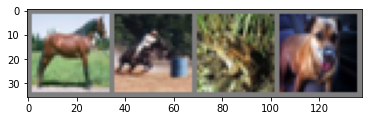

In [13]:
import matplotlib.pyplot as plt
import numpy as np

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img) :
    img = img / 2 + 0.5 # 역정규화
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# 무작위로 학습 이미지 추출하기
dataiter = iter(trainloader)
images, labels = next(dataiter)

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))

# labels 출력하기
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

위에서 다뤘던 내용들을 종합해 모델을 학습시켜보자.

In [14]:
#%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

첫째로, 학습 및 테스트 데이터셋이 필요하다.

In [15]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./root', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


이제 DataLoader 출력을 확인해보자.

plane truck  bird  bird


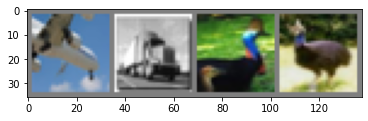

In [16]:
# 이미지를 시각화해서 보여주는 함수를 작성해보자
def imshow(img) :
    img = img / 2 + 0.5 # 역정규화
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# 무작위로 학습 이미지 가져오기
dataiter = iter(trainloader)
images, labels = next(dataiter)

# 이미지 시각화하기
imshow(torchvision.utils.make_grid(images))

# 정답 label 출력하기
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

이제 모델을 학습시킬 차례다. 모델 구조가 익숙하게 보이는데, 앞서 다룬 3채널(color) 이미지에 맞게 변형된 LeNet 모델이기 때문이다.

In [17]:
class Net(nn.Module) :
    def __init__(self) :
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x) :
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

마지막으로 학습에 필요한 손실 함수 및 최적화 방법을 알아보자.

In [18]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

손실 함수(loss function)는 데이터 기반으로 모델이 예측한 정답 값이 얼마나 차이가 나는지를 표현하는 지표다. Cross-entropy 손실 함수는 일반적으로 분류모델에서 전형적으로 사용하는 손실 함수다.

optimizer는 학습의 필수요소다. 아래 예제에서 간단한 최적화 알고리즘인 stochastic gradient descent를 구현해보자. SGD 알고리즘은 학습 속도인 learning rate('```lr```') 및 momentum과 같은 매개 변수 외에도 모델의 모든 학습 가중치 값인 ```net.parameters()```를 전달하는데, 이 함수는 최적화를 위해 파라미터를 조정한다.

마지막으로, 모든 것이 학습 loop에 들어간다.

In [19]:
for epoch in range(2) : # 데이터셋을 여러 번 반복 학습한다. 여기선 2번만 하자.
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0) :
        # 데이터를 통해 이미지와 정답값을 받는다.
        inputs, labels = data 

        # 초기 기울기 파라미터를 0으로 둔다.
        optimizer.zero_grad() # 기울기는 batch에 걸쳐 누적된다.

        # forward + backward + optimize
        outputs = net(inputs) # 모델보고 예측해보라고 하자.
        loss = criterion(outputs, labels) # 모델의 결과 값과 정답 값 차이인 손실값을 계산한다.
        loss.backward() # 모델의 학습 기울기를 계산한다.
        optimizer.step() # 학습 단계의 최적화를 진행한다. backward()를 통해 손실값을 줄일 수 있는 방향으로 학습 가중치들을 조정한다.

        # epoch 및 loss 값을 출력한다.
        running_loss += loss.item()
        if i % 2000 == 1999 : # 2000 mini batches 마다 값을 출력해주자
            print('[%d, %5d] loss : %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
        
print('학습 끝!')

[1,  2000] loss : 2.188
[1,  4000] loss : 1.869
[1,  6000] loss : 1.695
[1,  8000] loss : 1.584
[1, 10000] loss : 1.523
[1, 12000] loss : 1.480
[2,  2000] loss : 1.426
[2,  4000] loss : 1.382
[2,  6000] loss : 1.379
[2,  8000] loss : 1.329
[2, 10000] loss : 1.328
[2, 12000] loss : 1.343
학습 끝!


손실 값은 단조롭게 감소하며, 이는 모델이 훈련 데이터셋에서 성능을 계속 향상시키고 있다는 뜻이다.

마지막 단계로 모델이 단순하게 학습 데이터셋을 기억하는 게 아니라 실제로 일반화된 학습을 잘 수행하고 있는지 확인할 필요가 있다. 이를 과적합이라 부르며 일반적으로 데이터셋이 너무 작거나, 모델이 데이터셋을 올바르게 모델링하는 데 필요한 것보다 더 많은 학습 파라미터를 가지고 있다는 뜻이다.

위와 같이 학습 및 테스트 데이터셋으로 분할하는 이유이기도 하다. 모델의 일반성을 테스트하기 위해서 학습하지 않은 데이터에 대해 예측하게 하는 것이다.

In [20]:
correct = 0
total = 0
with torch.no_grad() :
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('1만장 테스트 이미지에서 모델 정확도 >>> %d %%' % (100 * correct / total))

1만장 테스트 이미지에서 모델 정확도 >>> 100 %


모델의 정확도는 약 50% 정도 나온다는 걸 알 수 있다. 이게 최신 기술은 아닐 수도 있지만, 무작위 결과에서 기대할 수 있는 정확도보다 10% 정도 좋은 결과를 보여주긴 한다. 이런 결과가 의미하는 건 이 모델이 일반적인 학습을 했음을 보여주는 것이다.